# K-Nearest Neighbors Classifier for Diabetes

## Objective
Use the K-Nearest Neighbors (KNN) algorithm to classify whether or not patients have diabetes.

## Steps
1. Load dataset.
2. Understand Information.
3. Data Preprocessing.
4. Implement KNN Classifier.
5. Determine Optimal Number of Neighbors.
6. Plot the Cross-Validation Scores
7. Discussion

## Setup Environment

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Dataset


We begin by loading ths Diabetes Database.

In [3]:
csv_file = 'diabetes.csv'

data = pd.read_csv(csv_file)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Understand Information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. Data Preprocessing

We will handle any missing values, balance the dataset if needed, and normalize numerical features.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data.fillna(data.mean(), inplace = True)

X = data.drop('Outcome', axis = 1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Implement KNN Classifier

We will use the K-Nearest Neighbors algorithm to classify whether or not patients have diabetes.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

### Prediction

In [8]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [9]:
accuracy = metrics.accuracy_score(y_test, pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.6948051948051948


## 4. Determine Optimal Number of Neighbors

We will use cross-validation to determine the optimal number of neighbors for the KNN classifier.

In [11]:
from sklearn.model_selection import cross_val_score

neighbours = range(1, 31)
cv_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

## 5. Plot the Cross-Validation Scores

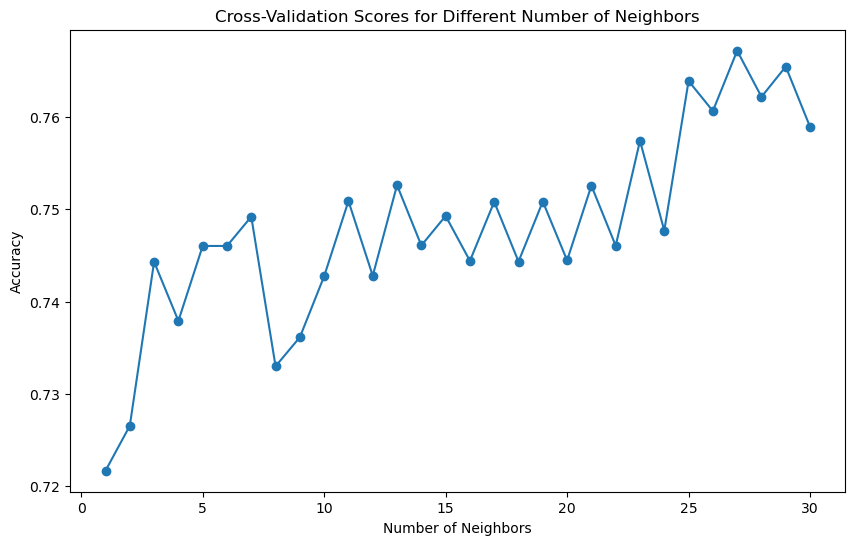

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(neighbours, cv_scores, marker='o')
plt.title('Cross-Validation Scores for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 5. Discussion

We analyze the model's accuracy and discuss potential improvements and biases.

### Model Accuracy

- The accuracy score shows the proportion of correct predictions.

### Optimal Number of Neighbors

- Cross-validation helps in determining the best number of neighbors for the KNN classifier to balance bias and variance.

### Potential Improvements

- Use more advanced classification o the model.

### Potential Biases

- The dataset may not be representative of all patient demographics.
- The model may overfit or underfit if not properly validated. validated.